In [131]:
import numpy as np
import pandas as pd

In [132]:
data = pd.read_csv('2.csv')
data

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h
0,Nepal,South-East Asia,50371395.0,15217.82,812397.0,245.44,129954.0,809304.0,244.51,14169.0,4.28,2175.0
1,Mongolia,Western Pacific,39010883.0,2826.86,171226.0,12.41,24451.0,NaN,37.52,2057.0,0.15,312.0
2,Central African Republic,Africa,24749574.0,11643.60,NaN,63.54,20581.0,NaN,324.33,3723.0,1.75,610.0
3,Philippines,Western Pacific,9255246.0,13633.51,275313.0,405.55,45699.0,158062.0,232.83,868.0,1.28,140.0
4,Réunion,Africa,8876775.0,6082.71,209122.0,143.30,31339.0,246708.0,169.05,7296.0,5.00,1077.0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Bahrain,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
232,Zambia,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
233,Madagascar,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0
234,Saudi Arabia,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [133]:
data['fatality_rate'] = data['deaths'] / data['cases'] * 100

In [134]:
data

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate
0,Nepal,South-East Asia,50371395.0,15217.82,812397.0,245.44,129954.0,809304.0,244.51,14169.0,4.28,2175.0,1.606674
1,Mongolia,Western Pacific,39010883.0,2826.86,171226.0,12.41,24451.0,NaN,37.52,2057.0,0.15,312.0,NaN
2,Central African Republic,Africa,24749574.0,11643.60,NaN,63.54,20581.0,NaN,324.33,3723.0,1.75,610.0,NaN
3,Philippines,Western Pacific,9255246.0,13633.51,275313.0,405.55,45699.0,158062.0,232.83,868.0,1.28,140.0,1.707810
4,Réunion,Africa,8876775.0,6082.71,209122.0,143.30,31339.0,246708.0,169.05,7296.0,5.00,1077.0,2.779253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Bahrain,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN
232,Zambia,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN
233,Madagascar,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN
234,Saudi Arabia,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN


In [135]:
mcases = data['cases'].max()
mcases

50371395.0

In [136]:
import matplotlib.pyplot as plt

In [137]:
country = data.loc[data["cases"] == mcases]
country

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate
0,Nepal,South-East Asia,50371395.0,15217.82,812397.0,245.44,129954.0,809304.0,244.51,14169.0,4.28,2175.0,1.606674


<AxesSubplot:xlabel='cases'>

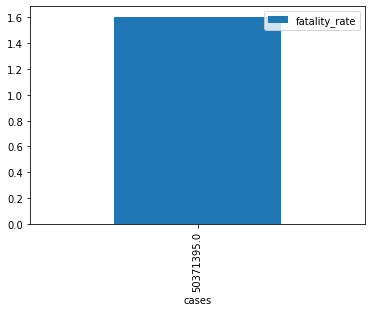

In [138]:
country.plot(x = "cases", y = "fatality_rate",  kind = "bar")

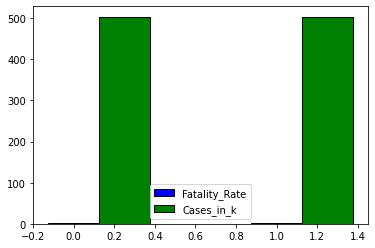

In [139]:
n = 2
r = np.arange(n)
width = 0.25
plt.bar(r, country["fatality_rate"], color = 'b', width = width, edgecolor = "black", label = 'Fatality_Rate')
plt.bar(r + width, country["cases"] / 100000, color = 'g', width = width, edgecolor = "black", label = 'Cases_in_k')
plt.legend()
plt.show()

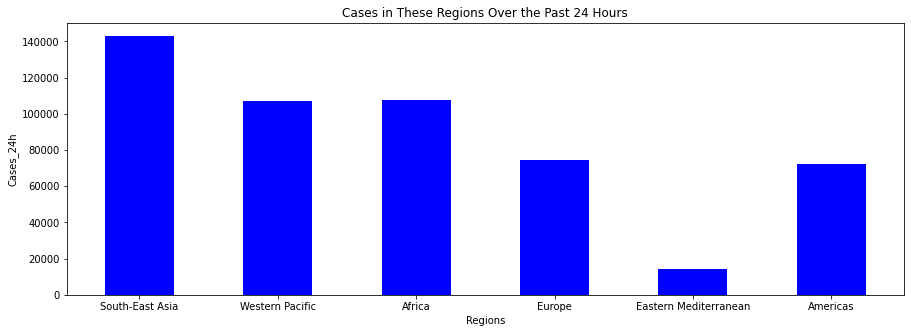

In [153]:
fig = plt.figure(figsize=(15, 5))

reg_list = {}

for region in data["region"]:
    if region not in reg_list:
        reg_list[region] = 0

for reg in reg_list.keys():
    reg_list[reg] = data.loc[data["region"] == reg]["cases24h"].sum()

plt.bar(list(reg_list.keys()), list(reg_list.values()), width=0.5, color="b")
plt.xlabel("Regions")
plt.ylabel("Cases_24h")
plt.title("Cases in These Regions Over the Past 24 Hours")
plt.show()

In [141]:
data["population"] = data['cases'] / data['cases100k'] * 100000
data

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate,population
0,Nepal,South-East Asia,50371395.0,15217.82,812397.0,245.44,129954.0,809304.0,244.51,14169.0,4.28,2175.0,1.606674,3.310027e+08
1,Mongolia,Western Pacific,39010883.0,2826.86,171226.0,12.41,24451.0,NaN,37.52,2057.0,0.15,312.0,NaN,1.380008e+09
2,Central African Republic,Africa,24749574.0,11643.60,NaN,63.54,20581.0,NaN,324.33,3723.0,1.75,610.0,NaN,2.125595e+08
3,Philippines,Western Pacific,9255246.0,13633.51,275313.0,405.55,45699.0,158062.0,232.83,868.0,1.28,140.0,1.707810,6.788601e+07
4,Réunion,Africa,8876775.0,6082.71,209122.0,143.30,31339.0,246708.0,169.05,7296.0,5.00,1077.0,2.779253,1.459345e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Bahrain,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN,NaN
232,Zambia,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN,NaN
233,Madagascar,Africa,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN,NaN
234,Saudi Arabia,Eastern Mediterranean,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,NaN,NaN


In [142]:
data.isnull().sum()

name                0
region              0
cases               0
cases100k           2
cases7days          2
cases7days100k      1
cases24h            0
deaths              2
deaths100k          1
deaths7days         2
deaths7days100k     1
deaths24h           0
fatality_rate      14
population         14
dtype: int64

In [143]:
data["cases100k"].fillna(data['cases100k'].mean(), inplace = True)
data["cases7days"].fillna(data['cases24h'] * 7, inplace = True)
data["cases7days"] = data['cases7days'].astype(int)
data["cases7days100k"].fillna(data['cases7days100k'].mean(), inplace = True)
data["deaths"].fillna(data["deaths"].mean(), inplace = True)
data['deaths'] = data['deaths'].astype(int)
data['deaths100k'].fillna(data['deaths100k'].mean(), inplace = True)
data['deaths7days'].fillna(data['deaths7days'].mean(), inplace = True)
data['deaths7days100k'].fillna(data['deaths7days100k'].mean(), inplace = True)
data['fatality_rate'].fillna(data['deaths'] / data['cases'] * 100, inplace = True)
data['fatality_rate'].fillna(0, inplace = True)
data['population'].fillna(data['cases'] / data['cases100k'] * 100000, inplace = True)
data['population'].fillna(data['population'].mean(), inplace = True)

data

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate,population
0,Nepal,South-East Asia,50371395.0,15217.82,812397,245.44,129954.0,809304,244.51,14169.0,4.28,2175.0,1.606674,3.310027e+08
1,Mongolia,Western Pacific,39010883.0,2826.86,171226,12.41,24451.0,18590,37.52,2057.0,0.15,312.0,0.047653,1.380008e+09
2,Central African Republic,Africa,24749574.0,11643.60,144067,63.54,20581.0,18590,324.33,3723.0,1.75,610.0,0.075112,2.125595e+08
3,Philippines,Western Pacific,9255246.0,13633.51,275313,405.55,45699.0,158062,232.83,868.0,1.28,140.0,1.707810,6.788601e+07
4,Réunion,Africa,8876775.0,6082.71,209122,143.30,31339.0,246708,169.05,7296.0,5.00,1077.0,2.779253,1.459345e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Bahrain,Eastern Mediterranean,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07
232,Zambia,Africa,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07
233,Madagascar,Africa,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07
234,Saudi Arabia,Eastern Mediterranean,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07


In [150]:
data2 = data
data2['outbreak'] = data2['cases24h'] / data2['cases7days']
data2 = data2.sort_values(by = 'outbreak', ascending = False)
data2

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate,population,outbreak
202,Italy,Europe,2583.0,4856.80,343,644.40,199.0,18,34.60,3.0,6.49,0.0,0.696864,5.318317e+04,0.580175
211,Israel,Europe,319.0,553.56,9,15.99,5.0,3,5.99,1.0,2.00,1.0,0.940439,5.762700e+04,0.555556
209,Puerto Rico,Americas,574.0,3825.94,104,690.05,53.0,1,7.67,0.0,0.00,0.0,0.174216,1.500285e+04,0.509615
87,Papua New Guinea,Western Pacific,238340.0,115.62,1662,0.81,747.0,3154,1.53,24.0,0.01,13.0,1.323320,2.061408e+08,0.449458
179,Saint Kitts and Nevis,Americas,7746.0,218.41,14,0.39,6.0,48,1.36,0.0,0.00,0.0,0.619675,3.546541e+06,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Bahrain,Eastern Mediterranean,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07,NaN
232,Zambia,Africa,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07,NaN
233,Madagascar,Africa,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07,NaN
234,Saudi Arabia,Eastern Mediterranean,0.0,0.00,0,0.00,0.0,0,0.00,0.0,0.00,0.0,0.000000,3.458650e+07,NaN


In [151]:
critical = data2.head(10)
critical

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality_rate,population,outbreak
202,Italy,Europe,2583.0,4856.80,343,644.40,199.0,18,34.60,3.0,6.49,0.0,0.696864,5.318317e+04,0.580175
211,Israel,Europe,319.0,553.56,9,15.99,5.0,3,5.99,1.0,2.00,1.0,0.940439,5.762700e+04,0.555556
209,Puerto Rico,Americas,574.0,3825.94,104,690.05,53.0,1,7.67,0.0,0.00,0.0,0.174216,1.500285e+04,0.509615
87,Papua New Guinea,Western Pacific,238340.0,115.62,1662,0.81,747.0,3154,1.53,24.0,0.01,13.0,1.323320,2.061408e+08,0.449458
179,Saint Kitts and Nevis,Americas,7746.0,218.41,14,0.39,6.0,48,1.36,0.0,0.00,0.0,0.619675,3.546541e+06,0.428571
165,Kenya,Africa,14559.0,1037.68,339,24.19,144.0,177,12.63,8.0,0.58,5.0,1.215743,1.403034e+06,0.424779
140,Iran (Islamic Republic of),Eastern Mediterranean,35058.0,266.95,78,0.60,31.0,441,3.36,5.0,0.03,0.0,1.257915,1.313280e+07,0.397436
181,Monaco,Europe,7034.0,357.40,9,0.47,3.0,155,7.89,0.0,0.00,0.0,2.203583,1.968103e+06,0.333333
122,Portugal,Europe,65708.0,73.36,148,0.16,49.0,1249,1.39,2.0,0.00,0.0,1.900834,8.956925e+07,0.331081
182,Tajikistan,Europe,6998.0,28.91,69,0.29,22.0,235,0.97,2.0,0.01,0.0,3.358102,2.420616e+07,0.318841


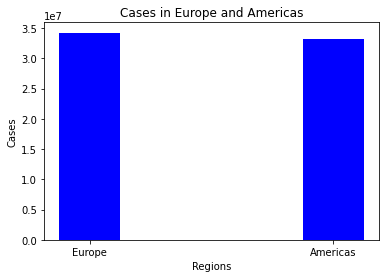

In [167]:
reg_list = {}
for regions in data["region"]:
    if regions not in reg_list and (regions == 'Europe' or regions == 'Americas'):
        reg_list[regions] = 0

for regs in reg_list.keys():
    reg_list[regs] = data.loc[data["region"] == regs]["cases"].sum()

plt.bar(list(reg_list.keys()), list(reg_list.values()), width=0.25, color="b")
plt.xlabel("Regions")
plt.ylabel("Cases")
plt.title("Cases in Europe and Americas")
plt.show()

# Europe has more cases than America

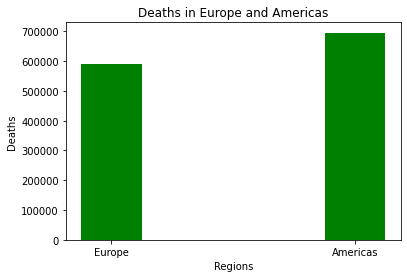

In [166]:
reg_list = {}
for regions in data["region"]:
    if regions not in reg_list and (regions == 'Europe' or regions == 'Americas'):
        reg_list[regions] = 0

for regs in reg_list.keys():
    reg_list[regs] = data.loc[data["region"] == regs]["deaths"].sum()

plt.bar(list(reg_list.keys()), list(reg_list.values()), width=0.25, color="g")
plt.xlabel("Regions")
plt.ylabel("Deaths")
plt.title("Deaths in Europe and Americas")
plt.show()

# America has more deaths than Europe meaning it was affected more adversely than Europe